In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
cardio = pd.read_csv('dataset.csv')

In [5]:
#Check any null values
cardio.isnull().any()

Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool

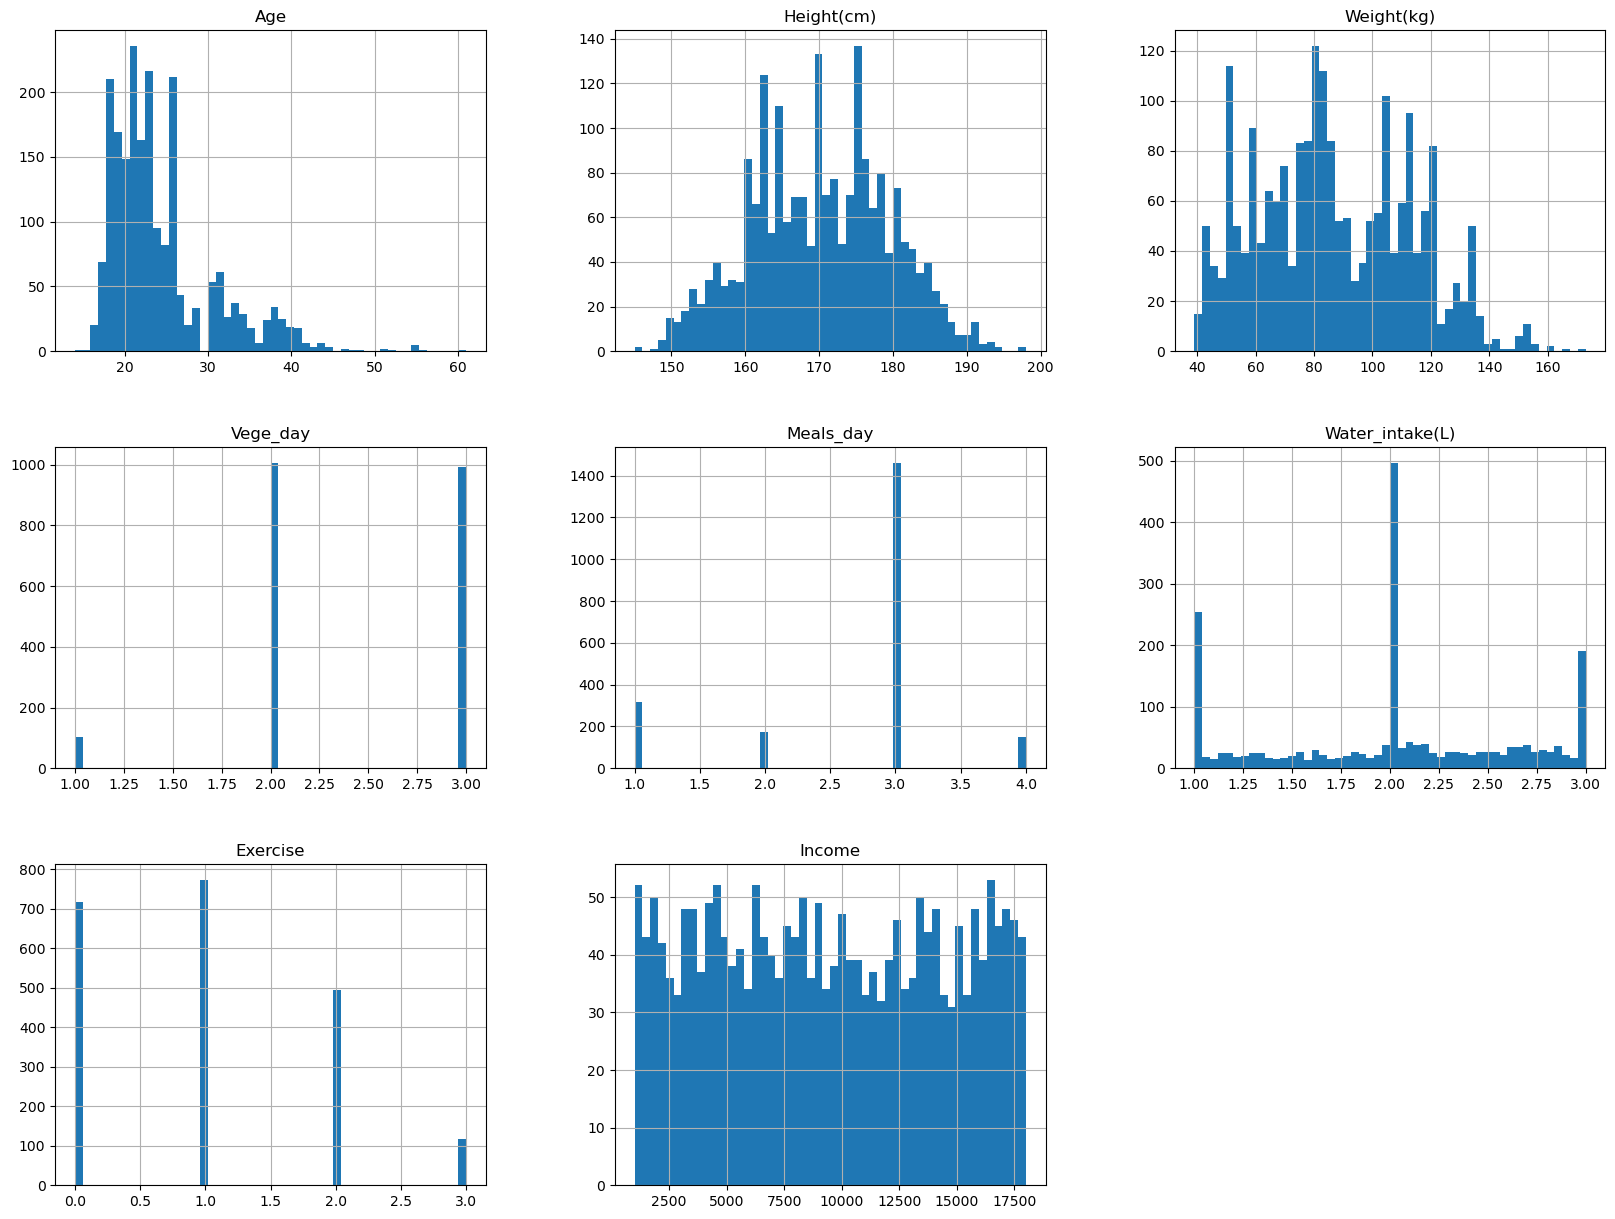

In [6]:
cardio.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# Separate the output vector from the input matrix
X = cardio.drop(['Cardiovascular_risk(y)'], axis=1)
y = cardio['Cardiovascular_risk(y)']

print ('X: shape=', X.shape, 'type=', type(X))
print ('y: shape=', y.shape, 'type=', type(y))

X: shape= (2100, 17) type= <class 'pandas.core.frame.DataFrame'>
y: shape= (2100,) type= <class 'pandas.core.series.Series'>


In [8]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print ('full set shape=', X.shape)
print ('train shape=', X_train.shape)
print ('test shape=', X_test.shape)

full set shape= (2100, 17)
train shape= (1680, 17)
test shape= (420, 17)


In [17]:
# Split the input matrix into numerical and categorical sets
X_train_num = X_train.drop(['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline'], axis = 1)
X_gender = X_train['Gender']
X_fam = X_train['Family_history']
X_alcohol = X_train['Alcohol']
X_junk = X_train['Junk_food']
X_snack = X_train['Snack']
X_smoke = X_train['Smoking']
X_transport = X_train['Transportation']
X_tv = X_train['TV']
X_discipline = X_train['Discipline']



In [18]:
print('X_train_num shape:', X_train_num.shape)

X_train_num shape: (1680, 8)


In [22]:
#standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy = False)
scaler.fit(X_train_num)       
X_train_num_tr = scaler.transform(X_train_num)

print('>>> Mean of all columns:\n', X_train_num_tr.mean(axis=0))
print('\n>>> Std of all columns:\n', X_train_num_tr.std(axis=0))

>>> Mean of all columns:
 [-1.05735526e-18  5.81545394e-18 -1.58603289e-17 -7.19001578e-17
 -4.22942105e-17  2.11471052e-18  4.22942105e-18  1.05735526e-17]

>>> Std of all columns:
 [1. 1. 1. 1. 1. 1. 1. 1.]


In [86]:
#one hot encoding - gender,fam, junk,smoking, transport,discipline
from sklearn.preprocessing import LabelBinarizer

lb_encoder = LabelBinarizer()
X_gender_tr = lb_encoder.fit_transform(X_gender) 
X_fam_tr = lb_encoder.fit_transform(X_fam)
X_junk_tr = lb_encoder.fit_transform(X_junk)
X_smoke_tr = lb_encoder.fit_transform(X_smoke)
X_transport_tr = lb_encoder.fit_transform(X_transport)
X_discipline_tr = lb_encoder.fit_transform(X_discipline)



In [87]:
#label encoding - alcohol, snack,tv
from sklearn.preprocessing import LabelEncoder

le_encoder = LabelEncoder()
label_mapping = {'none': 0, 'low': 1, 'medium': 2, 'high': 3}
le_encoder.classes_ = [k for k in label_mapping.keys()]
X_alcohol_tr = le_encoder.fit_transform([label_mapping[label] for label in X_alcohol])

label_mapping = {'No': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
le_encoder.classes_ = [k for k in label_mapping.keys()]
X_snack_tr = le_encoder.fit_transform([label_mapping[label] for label in X_snack])

label_mapping = {'rare': 0, 'moderate': 1, 'often': 2}
le_encoder.classes_ = [k for k in label_mapping.keys()]
X_tv_tr = le_encoder.fit_transform([label_mapping[label] for label in X_tv])

In [88]:
#Finalize training set
X_alcohol_tr = X_alcohol_tr.reshape(-1, 1)
X_snack_tr = X_snack_tr.reshape(-1, 1)
X_tv_tr = X_tv_tr.reshape(-1, 1)
X_train_tr = np.hstack([X_train_num_tr, X_gender_tr, X_fam_tr, X_junk_tr,X_smoke_tr, X_transport_tr, X_discipline_tr,
                        X_alcohol_tr, X_snack_tr, X_tv_tr])

print('X_train_tr shape:', X_train_tr.shape)

X_train_tr shape: (1680, 21)


AttributeError: 'numpy.ndarray' object has no attribute 'head'